In [2]:
import cv2
from matplotlib import pyplot as plt

In [8]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_graph = "frozen_inference_graph.pb"

In [9]:
model = cv2.dnn_DetectionModel(frozen_graph, config_file)

In [10]:
classLabels = []  
filename = 'coco_labels.txt'
with open(filename, 'rt') as spt:
    classLabels = spt.read().rstrip('\n').split('\n')
    #classlabels.append(fpt.append)

In [11]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [12]:
print(len(classLabels))

80


In [20]:
model.setInputSize(320, 320) #greater this value better the reults tune it for best output
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True) # --> this automatically changes the image from BGR to RGB

< cv2.dnn.Model 0000018D42DE7510>

### read an image

In [39]:
img = cv2.imread('input_image_2.png')

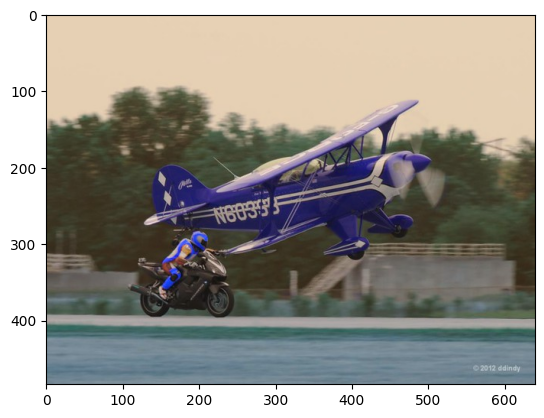

In [40]:
plt.imshow(img) # opencv's format of BGR

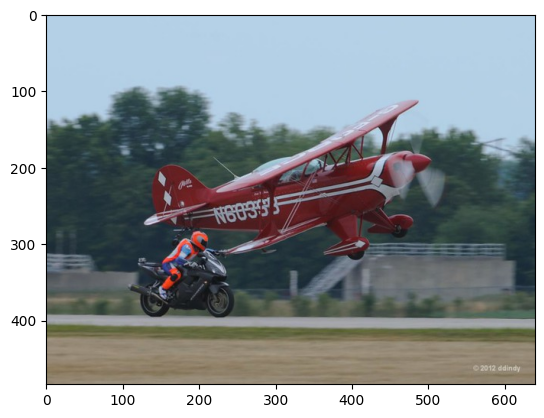

In [41]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [42]:
classIndex, confidence, bbox = model.detect(img, confThreshold=0.35) 
#tune confThreshold for best results

In [43]:
print(classIndex)

[5 4 1]


In [44]:
font = cv2.FONT_HERSHEY_PLAIN

for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[classInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = 2, color=(0, 255, 0), thickness=2)

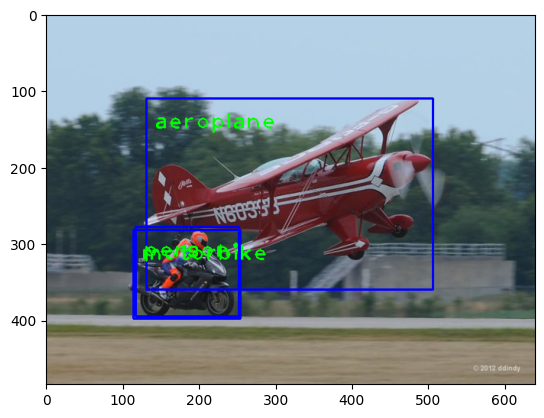

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [36]:
cv2.imwrite('result_1.png', img)

True